In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint
from api_keys import api_key

In [2]:
base_url = "https://api.usa.gov/crime/fbi/sapi/api/"

In [3]:
# NATIONAL LEVEL summary-controller

# Setting variable for offense so that you can easily have the URL filter by specific offense type
nat_since = "2000"
nat_until = "2019"

# This field can be age, count, ethnicity, race, sex
#nat_variable = "age"
# https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2000/2019?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

# Building query URL
nat_query_url = f"{base_url}estimates/national/{nat_since}/{nat_until}?API_KEY={api_key}"
nat_query_url

'https://api.usa.gov/crime/fbi/sapi/api/estimates/national/2000/2019?API_KEY=cflHyG9x1XDXBgcVSb4tVrfvlJ40CZESdtJRqOVe'

In [4]:
# Getting data
nat_fbi_response = requests.get(nat_query_url)
nat_fbi_json = nat_fbi_response.json()
nat_fbi_json

{'results': [{'state_id': None,
   'state_abbr': '',
   'year': 2015,
   'population': 320896618,
   'violent_crime': 1199310,
   'homicide': 15883,
   'rape_legacy': 91261,
   'rape_revised': 126134,
   'robbery': 328109,
   'aggravated_assault': 764057,
   'property_crime': 8024115,
   'burglary': 1587564,
   'larceny': 5723488,
   'motor_vehicle_theft': 713063,
   'arson': 44059},
  {'state_id': None,
   'state_abbr': '',
   'year': 2000,
   'population': 281421906,
   'violent_crime': 1425486,
   'homicide': 15586,
   'rape_legacy': 90178,
   'rape_revised': None,
   'robbery': 408016,
   'aggravated_assault': 911706,
   'property_crime': 10182584,
   'burglary': 2050992,
   'larceny': 6971590,
   'motor_vehicle_theft': 1160002,
   'arson': 69466},
  {'state_id': None,
   'state_abbr': '',
   'year': 2001,
   'population': 285317559,
   'violent_crime': 1439480,
   'homicide': 16037,
   'rape_legacy': 90863,
   'rape_revised': None,
   'robbery': 423557,
   'aggravated_assault': 90

In [5]:
# Testing if keys are correct to grab the specific data
print(nat_fbi_json["results"][0]["year"])

2015


In [11]:
# Creating lists to then later append with data from JSON data
nat_year = []
nat_population = []
nat_agg_assault = []
nat_arson = []
nat_burglary = []
nat_homicide = []
nat_larceny = []
nat_motor_theft = []
nat_prop_crime = []
nat_rape_legacy = []
nat_rape_revised = []
nat_robbery = []
nat_violent_crime = []
nat_num = 0

for x in nat_fbi_json["results"]:
    nat_year.append(nat_fbi_json["results"][nat_num]["year"])
    nat_population.append(nat_fbi_json["results"][nat_num]["population"])
    nat_agg_assault.append(nat_fbi_json["results"][nat_num]["aggravated_assault"])
    nat_arson.append(nat_fbi_json["results"][nat_num]["arson"])
    nat_burglary.append(nat_fbi_json["results"][nat_num]["burglary"])
    nat_homicide.append(nat_fbi_json["results"][nat_num]["homicide"])
    nat_larceny.append(nat_fbi_json["results"][nat_num]["larceny"])
    nat_motor_theft.append(nat_fbi_json["results"][nat_num]["motor_vehicle_theft"])
    nat_prop_crime.append(nat_fbi_json["results"][nat_num]["property_crime"])
    nat_rape_legacy.append(nat_fbi_json["results"][nat_num]["rape_legacy"])
    nat_rape_revised.append(nat_fbi_json["results"][nat_num]["rape_revised"])
    nat_robbery.append(nat_fbi_json["results"][nat_num]["robbery"])
    nat_violent_crime.append(nat_fbi_json["results"][nat_num]["violent_crime"])
    nat_num +=1

In [14]:
# Create a dictionary to hold the keys(titles) and lists
nat_fbi_dict = {
    "Data Year": nat_year,
    "Population": nat_population,
    "National Aggravated Assault": nat_agg_assault,
    "National Arson": nat_arson,
    "National Burglary": nat_burglary,
    "National Homicide": nat_homicide,
    "National Larceny": nat_larceny,
    "National Motor Vehicle Theft": nat_motor_theft,
    "National Property Crime": nat_prop_crime,
    "National Rape Legacy": nat_rape_legacy,
    "National Rape Revised": nat_rape_revised,
    "National Robbery":  nat_robbery,
    "National Violent Crime": nat_violent_crime
}

nat_fbi_df = pd.DataFrame(nat_fbi_dict)
nat_fbi_df

,Data Year,Population,National Aggravated Assault,National Arson,National Burglary,National Homicide,National Larceny,National Motor Vehicle Theft,National Property Crime,National Rape Legacy,National Rape Revised,National Robbery,National Violent Crime
0,2015,320896618,764057,44059,1587564,15883,5723488,713063,8024115,91261.0,126134.0,328109,1199310
1,2000,281421906,911706,69466,2050992,15586,6971590,1160002,10182584,90178.0,NaN,408016,1425486
2,2001,285317559,909023,79040,2116531,16037,7092267,1228391,10437189,90863.0,NaN,423557,1439480
3,2002,287973924,891407,77148,2151252,16229,7057379,1246646,10455277,95235.0,NaN,420806,1423677
4,2003,290788976,859030,72811,2154834,16528,7026802,1261226,10442862,93883.0,NaN,414235,1383676
5,2004,293656842,847381,69302,2144446,16148,6937089,1237851,10319386,95089.0,NaN,401470,1360088
6,2005,296507061,862220,68510,2155448,16740,6783447,1235859,10174754,94347.0,NaN,417438,1390745
7,2006,299398484,874096,72972,2194993,17309,6626363,1198245,10019601,94472.0,NaN,449246,1435123
8,2007,301621157,866358,68092,2190198,17128,6591542,1100472,9882212,92160.0,NaN,447324,1422970
9,2008,304059724,843683,65794,2228887,16465,6586206,959059,9774152,90750.0,NaN,443563,1394461


In [15]:
# Sorting new data frame by year
nat_sorted_df = nat_fbi_df.sort_values(by=["Data Year"])
nat_sorted_df

,Data Year,Population,National Aggravated Assault,National Arson,National Burglary,National Homicide,National Larceny,National Motor Vehicle Theft,National Property Crime,National Rape Legacy,National Rape Revised,National Robbery,National Violent Crime
1,2000,281421906,911706,69466,2050992,15586,6971590,1160002,10182584,90178.0,NaN,408016,1425486
2,2001,285317559,909023,79040,2116531,16037,7092267,1228391,10437189,90863.0,NaN,423557,1439480
3,2002,287973924,891407,77148,2151252,16229,7057379,1246646,10455277,95235.0,NaN,420806,1423677
4,2003,290788976,859030,72811,2154834,16528,7026802,1261226,10442862,93883.0,NaN,414235,1383676
5,2004,293656842,847381,69302,2144446,16148,6937089,1237851,10319386,95089.0,NaN,401470,1360088
6,2005,296507061,862220,68510,2155448,16740,6783447,1235859,10174754,94347.0,NaN,417438,1390745
7,2006,299398484,874096,72972,2194993,17309,6626363,1198245,10019601,94472.0,NaN,449246,1435123
8,2007,301621157,866358,68092,2190198,17128,6591542,1100472,9882212,92160.0,NaN,447324,1422970
9,2008,304059724,843683,65794,2228887,16465,6586206,959059,9774152,90750.0,NaN,443563,1394461
10,2009,307006550,812514,59866,2203313,15399,6338095,795652,9337060,89241.0,NaN,408742,1325896


In [20]:
# Creating a new data frame to use when searching for specific info for graphing
year_search_df = nat_sorted_df.set_index("Data Year")
year_search_df

,Population,National Aggravated Assault,National Arson,National Burglary,National Homicide,National Larceny,National Motor Vehicle Theft,National Property Crime,National Rape Legacy,National Rape Revised,National Robbery,National Violent Crime
Data Year,,,,,,,,,,,,
2000,281421906,911706,69466,2050992,15586,6971590,1160002,10182584,90178.0,NaN,408016,1425486
2001,285317559,909023,79040,2116531,16037,7092267,1228391,10437189,90863.0,NaN,423557,1439480
2002,287973924,891407,77148,2151252,16229,7057379,1246646,10455277,95235.0,NaN,420806,1423677
2003,290788976,859030,72811,2154834,16528,7026802,1261226,10442862,93883.0,NaN,414235,1383676
2004,293656842,847381,69302,2144446,16148,6937089,1237851,10319386,95089.0,NaN,401470,1360088
2005,296507061,862220,68510,2155448,16740,6783447,1235859,10174754,94347.0,NaN,417438,1390745
2006,299398484,874096,72972,2194993,17309,6626363,1198245,10019601,94472.0,NaN,449246,1435123
2007,301621157,866358,68092,2190198,17128,6591542,1100472,9882212,92160.0,NaN,447324,1422970
2008,304059724,843683,65794,2228887,16465,6586206,959059,9774152,90750.0,NaN,443563,1394461


In [36]:
# Turning column into a list off the already sorted data frame
sorted_list = year_search_df["National Aggravated Assault"].tolist()
sorted_list

[911706,
 909023,
 891407,
 859030,
 847381,
 862220,
 874096,
 866358,
 843683,
 812514,
 781844,
 752423,
 762009,
 726777,
 731089,
 764057,
 802982,
 810319,
 810982,
 821182]

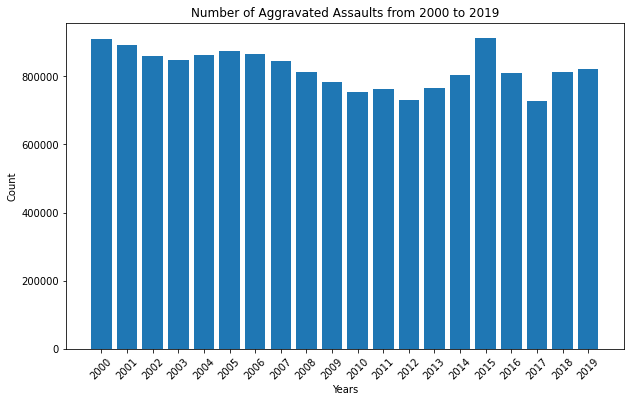

In [44]:
# Graphing info
plt.figure(figsize=(10,6))
plt.bar(nat_year, sorted_list)
plt.xticks(nat_year, rotation=45)
plt.xlabel("Years")
plt.ylabel("Count")
plt.title("Number of Aggravated Assaults from 2000 to 2019")
plt.show()

In [23]:
search_year = 2000
search_info = year_search_df.loc[search_year]

In [33]:
search_info

Population                      281421906.0
National Aggravated Assault        911706.0
National Arson                      69466.0
National Burglary                 2050992.0
National Homicide                   15586.0
National Larceny                  6971590.0
National Motor Vehicle Theft      1160002.0
National Property Crime          10182584.0
National Rape Legacy                90178.0
National Rape Revised                   NaN
National Robbery                   408016.0
National Violent Crime            1425486.0
Name: 2000, dtype: float64

In [25]:
#y_pos = np.arange(len(search_info))
#y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])